In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pandas as pd
import seaborn.apionly as sns
import re
import matplotlib.ticker as ticker
plt.style.use('ggplot')
sns.set_style('ticks')
# Enable inline plotting  
%matplotlib inline

In [3]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.5.5 | packaged by conda-forge | (default, Jul 23 2018, 23:45:11) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.23.4
Numpy version 1.15.2


In [4]:
data_1x='df7-comm-updated-1Xrmsd-v17.csv'
data_40x='df7-comm-updated-40Xrmsd-v17.csv'
data_70x='df7-comm-updated-70Xrmsd-v17.csv'
data_100x='df7-comm-updated-100Xrmsd-v17.csv'

In [5]:
df7_1x = pd.read_csv(data_1x)
df7_40x = pd.read_csv(data_40x)
df7_70x = pd.read_csv(data_70x)
df7_100x = pd.read_csv(data_100x)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.collections
from matplotlib.collections import LineCollection
from matplotlib.colors import colorConverter

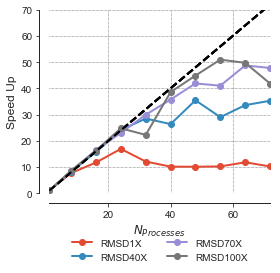

In [7]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

df = [df7_1x, df7_40x, df7_70x, df7_100x]
labels = ['RMSD1X','RMSD40X','RMSD70X','RMSD100X']

for i in range(len(df)):
    ax.plot(df[i]['blocks'], df[i]['speed_up'], marker='o', lw=2, label=labels[i])
    ax.plot(df[i]['blocks'], df[i]['Ideal_Scaling'], linestyle='--', color='k', lw=2, label='')
    
ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel('Speed Up')
ax.set_xlim(1, 72)
ax.set_ylim(0, 70)

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.2), frameon=False,fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Compute_to_IO_ratio_on_performance_2d_v17'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

/Users/mahzadkhoshlessan/miniconda3/envs/ml/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


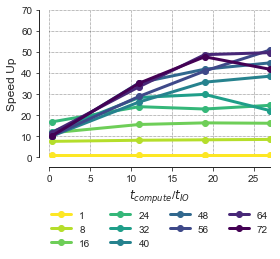

In [11]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

N_processes = [1, 8, 16, 24, 32, 40, 48, 56, 64, 72]
ys = [0.29, 11.0, 19.0, 27.0]
df = pd.DataFrame(index=range(len(N_processes)), columns=['block','RMSD1X','RMSD40X','RMSD70X','RMSD100X'])

for i,N_i in enumerate(N_processes):
    df.loc[i,'block'] = int(N_i)
    df.loc[i,'RMSD1X'] = df7_1x.loc[df7_1x['blocks']==N_i,'speed_up'].iloc[0]
    df.loc[i,'RMSD40X'] = df7_40x.loc[df7_40x['blocks']==N_i,'speed_up'].iloc[0]
    df.loc[i,'RMSD70X'] = df7_70x.loc[df7_70x['blocks']==N_i,'speed_up'].iloc[0]
    df.loc[i,'RMSD100X'] = df7_100x.loc[df7_100x['blocks']==N_i,'speed_up'].iloc[0]

ax = plt.subplot(111)
ax.set_prop_cycle("color", [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(N_processes))])
for i, N_i in enumerate(N_processes):
    ax.plot(ys, df.iloc[i,1:5], marker='o', lw=3, label=N_i)
    
ax.set_xlabel('$t_{compute}$/$t_{IO}$')
ax.set_ylabel('Speed Up')
ax.set_xlim(0, 27)
ax.set_ylim(0, 70)

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.3), fancybox=False,frameon=False,shadow=False, ncol=4)
plt.tight_layout()
plt.show()
fig_name = 'Compute_to_IO_ratio_on_performance_2d_2_v17'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

/Users/mahzadkhoshlessan/miniconda3/envs/ml/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


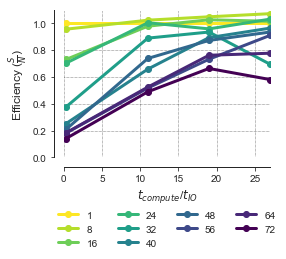

In [13]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

N_processes = [1, 8, 16, 24, 32, 40, 48, 56, 64, 72]
ys = [0.29, 11.0, 19.0, 27.0]
df = pd.DataFrame(index=range(len(N_processes)), columns=['block','RMSD1X','RMSD40X','RMSD70X','RMSD100X'])

for i,N_i in enumerate(N_processes):
    df.loc[i,'block'] = int(N_i)
    df.loc[i,'RMSD1X'] = df7_1x.loc[df7_1x['blocks']==N_i,'efficiency'].iloc[0]
    df.loc[i,'RMSD40X'] = df7_40x.loc[df7_40x['blocks']==N_i,'efficiency'].iloc[0]
    df.loc[i,'RMSD70X'] = df7_70x.loc[df7_70x['blocks']==N_i,'efficiency'].iloc[0]
    df.loc[i,'RMSD100X'] = df7_100x.loc[df7_100x['blocks']==N_i,'efficiency'].iloc[0]

ax = plt.subplot(111)
ax.set_prop_cycle("color", [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(N_processes))])
for i, N_i in enumerate(N_processes):
    ax.plot(ys, df.iloc[i,1:5], marker='o', lw=3, label=N_i)
    
ax.set_xlabel('$t_{compute}$/$t_{IO}$')
ax.set_ylabel(r'Efficiency ($\frac{S}{N}$)')
ax.set_xlim(0, 27)
ax.set_ylim(0, 1.1)

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.3),fancybox=False,frameon=False,shadow=False,ncol=4)

plt.tight_layout()
plt.show()
fig_name = 'Compute_to_IO_ratio_on_performance_2d_3_v17'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')